In [1]:
import napari
import napari_stress
import tqdm

from napari.types import SurfaceData
from napari_stress import measurements
import matplotlib.pyplot as plt
from pygeodesic import geodesic
import pygeodesic
import numpy as np

import napari_process_points_and_surfaces as nppas
from itertools import product, combinations, permutations

## Create sample data

In [2]:
# Get some sample data
pointcloud = napari_stress.get_droplet_point_cloud()[0]

In [3]:
max_degree = 5
fitted_points = napari_stress.fit_spherical_harmonics(pointcloud[0], max_degree=max_degree)

In [4]:
coefficients = fitted_points[1]['metadata']['spherical_harmonics_coefficients']
quadrature_points, lebedev_fit = napari_stress.lebedev_quadrature(coefficients=coefficients, number_of_quadrature_points=250, use_minimal_point_set=False)
manifold = napari_stress.create_manifold(quadrature_points, lebedev_fit=lebedev_fit, max_degree=max_degree)

In [5]:
surface = nppas.surface_from_point_cloud_ball_pivoting(quadrature_points)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Demonstrate geodesics

In [6]:
viewer = napari.Viewer(ndisplay=3)

Assistant skips harvesting pyclesperanto as it's not installed.


In [7]:
viewer.add_points(quadrature_points, size=0.1, face_color='orange')
viewer.add_surface(surface)

<Surface layer 'surface' at 0x1f49fd43130>

In [8]:
geoalg = geodesic.PyGeodesicAlgorithmExact(surface[0], surface[1])

In [9]:
distance, path = geoalg.geodesicDistance(0, 150)
edges = np.diff(path, axis=0)
points = path[:-1]
vectors = np.stack([points, edges]).transpose((1,0,2))

In [10]:
viewer.add_vectors(vectors, edge_width=0.1)

<Vectors layer 'vectors' at 0x1f4af02aa60>

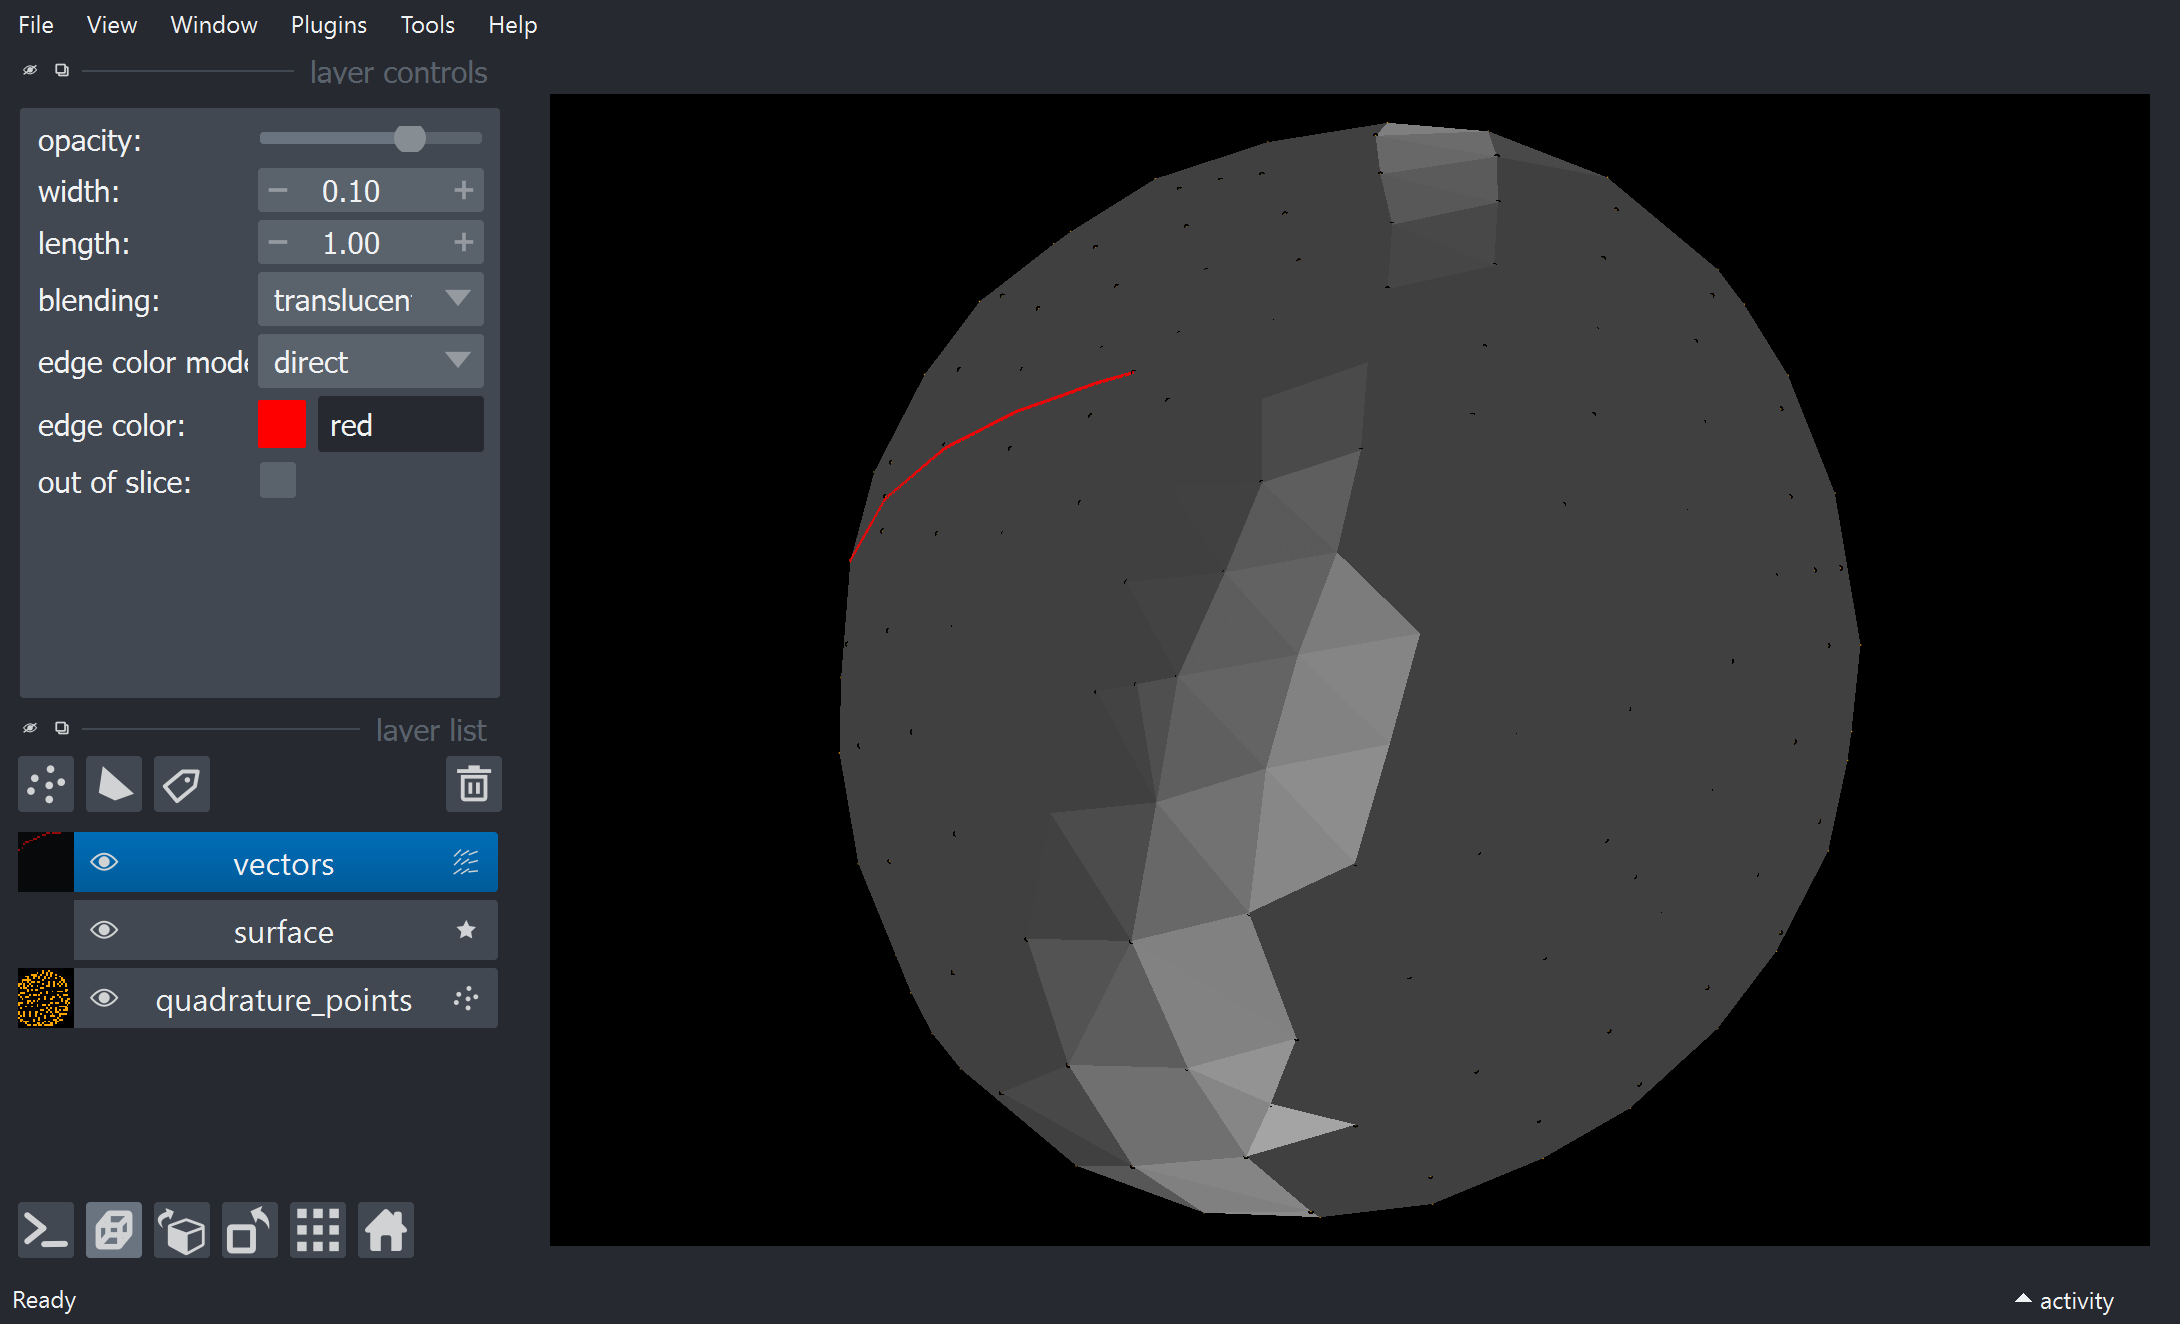

In [11]:
napari.utils.nbscreenshot(viewer)

## Measure stresses